In [3]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Import the NaMaster python wrapper
import pymaster as nmt

#  Simple example showcasing the use of NaMaster to compute the pseudo-Cl
#  estimator of the angular cross-power spectrum of a spin-0 field and a
#  spin-2 field

# HEALPix resolution parameter used here
nside = 256

# Read mask and apodize it on a scale of ~1deg
mask = nmt.mask_apodization(hp.read_map("mask.fits", verbose=False),
                            1., apotype="Smooth")
# hp.mollview(mask, coord=['G', 'C'], title='Apodized mask')
# plt.show()

In [7]:
map_0= hp.read_map("maps.fits", field=0, verbose=False)
map_2 = hp.read_map("maps.fits", field=[1, 2], verbose=False)

In [8]:
# Read healpix maps and initialize a spin-0 and spin-2 field
f_0 = nmt.NmtField(mask, [map_0])
f_2 = nmt.NmtField(mask, map_2)

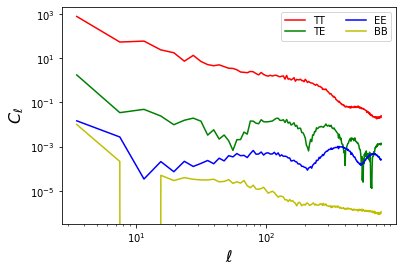

In [4]:

# Initialize binning scheme with 4 ells per bandpower
b = nmt.NmtBin.from_nside_linear(nside, 4)

# Compute MASTER estimator
# spin-0 x spin-0
cl_00 = nmt.compute_full_master(f_0, f_0, b)
# spin-0 x spin-2
cl_02 = nmt.compute_full_master(f_0, f_2, b)
# spin-2 x spin-2
cl_22 = nmt.compute_full_master(f_2, f_2, b)

# Plot results
ell_arr = b.get_effective_ells()
plt.plot(ell_arr, cl_00[0], 'r-', label='TT')
plt.plot(ell_arr, np.fabs(cl_02[0]), 'g-', label='TE')
plt.plot(ell_arr, cl_22[0], 'b-', label='EE')
plt.plot(ell_arr, cl_22[3], 'y-', label='BB')
plt.loglog()
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()
